파이썬 머신러닝 완벽가이드 ch8.4 pg.466~486

## Chapter 8 텍스트 분석

- NLP(National Language Processing): 머신이 인간의 언어를 이해하고 해석하는데 더 중점을 두고 기술이 발전해 왔음.

- 텍스트 마이닝(Text Mining): 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전해 왔음.

- NLP 기술이 발전함에 따라 텍스트 분석도 더욱 정교하게 발전할 수 있었음.

- **텍스트 분류**(Text Classification): 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법 

  ex. 특정 신문 기사 내용이 연애/정치/사회/문화 중 어떤 카테고리에 속하는지 자동으로 분류, 스팸 메일 검출 프로그램

- **감성 분석**(Sentiment Analysis): 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법 

  ex. 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정 또는 리뷰, 여론조사 의견 분석 등의 다양한 영역에서 활용

- **텍스트 요약**(Summarization): 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법

  ex. Topic Modeling

- **텍스트 군집화**(Clustering): 비슷한 유형의 문서에 대해 군집화를 수행하는 기법. 텍스트 분류를 비지도학습으로 수행하는 방법의 일환으로 사용될 수 있음. 유사도 측정 역시 문서들간의 유사도를 측정해 비슷한 문서끼리 모을 수 있는 방법


## 01 텍스트 분석 이해

- 피처 벡터화 (피처 추출): 텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여하면 텍스트는 단어의 조합인 벡터값으로 변환

- 텍스트를 피처 벡터화해서 변환하는 방법: BOW(Bag of Words), Word2Vec

- 텍스트 분석 수행 프로세스

  1. 텍스트 사전 준비작업 (텍스트 전처리): 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미 없는 단어(Stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업을 수행하는 것

  2. 피처 벡터화/추출: 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당함. 대표적인 방법은 BOW와 Word2Vec이 있으며, BOW는 대표적으로 Count 기반과 TF-IDF 기반 벡터화가 있음.

  3. ML 모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행

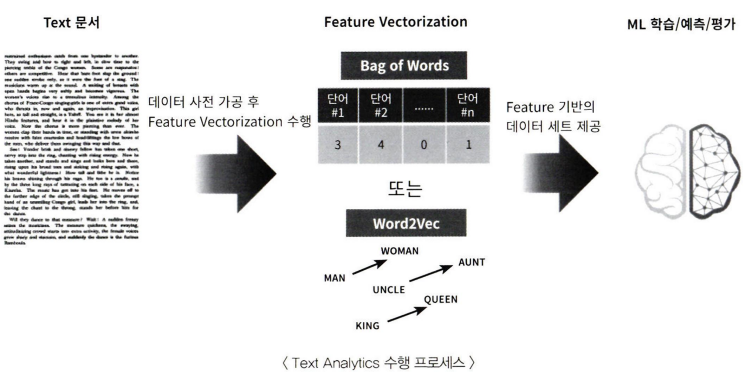

- 파이썬 기반의 NLP, 텍스트 분석 패키지

  - NLTK(Natural Language Toolkit for Python): 파이썬의 가장 대표적인 NLP 패키지. 방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버. 많은 NLP 패키지가 NLTK의 영향을 받아 작성되고 있음. 수행 속도 측면에서 아쉬운 부분이 있어 실제 대량의 데이터 기반에서는 제대로 활용되지 못하고 있음.

  - Gensim: 토픽 모델링 분야에서 가장 두각을 나타내는 패키지. 오래전부터 토픽 모델링을 쉽게 구현할 수 있는 기능을 제공해왔으며, Word2Vec 구현 등의 다양한 신기능도 제공함. SpaCy와 함께 가장 많이 사용되는 NLP 패키지

  - SpaCy: 뛰어난 예측 성능으로 최근 가장 주목을 받는 NLP 패키지. 많은 NLP 애플리케이션에서 SpaCy를 사용하는 사례가 늘고 있음.

## 02 텍스트 사전 준비 작업 (텍스트 전처리) - 텍스트 정규화

**텍스트 정규화**

- 클렌징 (Cleansing) 

- 토큰화

- 필터링/스톱 워드 제거/ 철자 수정

- Stemming

- Lemmatization

**클렌징** (Cleansing): 텍스트에서 분석에 오히려 방해가 되는 문자, 기호 등을 사전에 제거하는 작업. ex. HTML, XML 태그, 특정 기호

**토큰화** (Tokenization): 문서에서 문장을 분리하는 문장 토큰화와 문장에서 단어를 토큰으로 분리하는 단어 토큰화로 나뉨.

  - **문장 토큰화**: 문자의 마침표(,), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임. 정규 표현식에 따른 문장 토큰화도 가능함. 일반적으로 문장 토큰화는 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용함.

In [2]:
# 문장으로 분리
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
                You can see it out your window or on your television.\
                You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences)) # 리스트 객체 반환
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


**단어 토큰화**: 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리함. 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행할 수 있음. 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 됨.

In [3]:
from nltk import word_tokenize
sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
# 문서를 먼저 문장으로 나누고, 개별 문장을 다시 단어로 토큰화
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
  # 문장별로 분리 토큰
  sentences = sent_tokenize(text)
  # 분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

In [5]:
# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시됨. 이를 해결하기 위해 n-gram 도입.

- n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행함. 

**스톱 워드 제거**

- 스톱 워드(Stop word): 분석에 큰 의미가 없는 단어 

  ex. is, a, will, the



In [6]:
# 언어별로 스톱 워드가 목록화 되어 있음.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [8]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []

  # 개별 문장별로 토큰화된 문자 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    # 소문자로 모두 변환
    word = word.lower()
    # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization

**Stemming**: 의미론적인 기반에서 단어의 원형을 찾음. 원형 단어로 변환 시 일반적인 방법을 이용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음.

**Lemmatization**: 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌. 따라서, Stemming보다 변환에 더 시간이 오래 거림.

- NLTK의 LancasterStemmer: 진행형, 3인칭 단수, 과거형에 따른 동사, 비교, 최상에 따른 형용사의 변화에 따라 Stemming은 더 단순하게 원형 단어를 찾아줌.  

In [9]:
# Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused')) 
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest')) # 정확한 원형을 찾지 못하고 원형 단어에서 철자가 다른 어근 단어로 인식하는 경우 발생

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
nltk.download()

In [14]:
# Lemmatization - 정확한 원형 단어 추출을 위해 단어의 품사를 입력해주어야 함.
# 동사 - 'v', 형용사 - 'a'
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))
# Stemmer보다 정확하게 원형 단어를 추출해줌.

amuse amuse amuse
happy happy
fancy fancy


## 03 Bag of Words - BOW

**Bag of Words 모델**

- 문서가 가지는 모든 단어(words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여하여 피처 값을 추출하는 모델

- 문서 내 모든 단어를 한꺼번에 봉투(Bag) 안에 넣은 뒤에 흔들어서 섞는다는 의미

1. 문장1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어(feature 또는 term)를 칼럼 형태로 나열하고, 각 단어에 고유의 인덱스를 다음와 같이 부여함.

  ex. 'and':0, 'baseball':1, 'daughter':2, 'games':3, 'likes':4, 'my':5

2. 개별 문장에서 해당 단어가 나타나는 횟수를 각 단어(단어 인덱스)에 기재함. 

- 장점)
  
  - BOW 모델은 쉽고 빠른 구축 가능

  - 문서의 특징을 잘 나타낼 수 있는 모델로 전통적으로 여러 분야에서 활용도가 높음.

- 단점)
  - 문맥 의미(Semantic Context) 반영 부족: BOW는 단어의 순서를 고려하지 않기 때문에 문장 내에서 단어의 문맥적인 의미가 무시됨. 이를 보완하기 위해 n_gram 기법을 활용할 수 있지만, 제한적인 부분에 그치므로 언어의 많은 부분을 차지하는 문맥적인 해석을 처리하지 못함.

  - 희소 행렬 문제(희소성, 희소 행렬): BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움. 많은 문서에서 단어를 추출하면 매우 많은 단어가 칼럼으로 만들어지지만, 문서마다 서로 다른 단어로 구성되기에 단어가 문서마다 나타나지 않는 경우가 훨씬 많음. 희소 행렬은 일반적으로 ML알고리즘의 수행 시간과 예측 성능을 떨어뜨리기 때문에 희소 행렬을 위한 특별한 기법이 마련되어 있음.

**BOW 피처 벡터화**

- 머신러닝 알고리즘이 일반적으로 숫자형 피처를 데이터로 입력받아 동작하기 때문에 텍스트와 같은 데이터는 머신러닝 알고리즘에 바로 입력할 수 없어, 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환

- 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법

- 피처 벡터화는 기존 텍스트 데이터를 다른 형태의 피처의 조합으로 변경하기 때문에 넓은 범위의 피처 추출에 포함됨.

- m개의 문서에서 n개의 단어가 있으면, m*n 단어 피처로 이뤄진 행렬 구성

- BOW의 피처 벡터화 방식
  - 카운트 기반의 벡터화

  - TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화

- 카운트 벡터화: 단어 피처에 값을 부여할 때 각 단어에서 해당 단어가 나타나는 횟수. 카운트 값이 높을수록 중요한 단어로 인식됨.

- TF-IDF: 언어의 특성상 문장에서 자주 사용될 수밖에 없는 단어까지 높은 카운트가 부여되므로 이를 보완하기 위해 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여



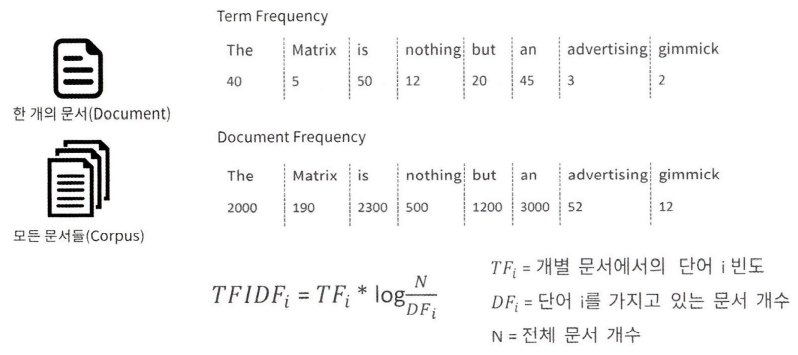

*** 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer**

사이킷런의 CountVectorizer 클래스

- 카운트 기반의 벡터화를 구현한 클래스

- 피처 벡터화, 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행

파라미터

- max_df: 전체 문서에 걸쳐 너무 높은 빈도수를 가지는 단어 피처를 제외. 너무 높은 빈도수를 가지는 단어는 스톱 워드와 비슷한 문법적인 특성으로 반복적인 단어일 가능성이 높기에 이를 제거

  ex. max_df=100과 같이 정수 값을 가지면 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출

  ex. max_df=0.95와 같이 부동소수점 값을 가지면 전체 문서에 걸쳐 빈도수 0~95%까지의 단어만 피처로 추출하고 나머지 상위 5%는 피처로 추출하지 않음.

- min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처 제외. 수백~수천 개의 문서에서 특정 단어가 적은 빈도수를 가진다면 크게 중요하지 않거나 garbage성 단어일 확률이 높음.

  ex. min_df=2, min_df=0.02

- max_features: 추출하는 피처의 개수를 제한하며 정수로 값을 지정함. 

  ex. max_features=2000: 가장 높은 빈도를 가지는 단어 순으로 정렬해 2000개까지만 피처로 추출

- stop_words: 'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외됨.

- n_gram_range: Bag of Words 모델의 단어 순서를 어느 정도 보강하기 위한 n_gram 범위를 설정. 튜플 형태로 (범위 최솟값, 범위 최댓값)을 지정함. 

  ex. n_gram_range=(1,2): 토큰화된 단어를 1개씩 순서대로 2개씩 묶어서 피처로 추출

- analyzer: 피처 추출을 수행한 단위 지정. 

  ex. analyzer = 'word' (default)

    analyzer = 'character': 특정 범위를 피처로 만드는 특정한 경우 등을 적용할 때 사용됨.

- token_pattern: 토큰화를 수행하는 정규 표현식 패턴을 지정. 

  ex. token_pattern='\b\w\w+\b'(default): 공백 또는 개행 문자 등으로 구분된 단어 분리자(\b) 사이의 2문자 (문자 또는 숫자) 이상의 단어를 토큰으로 분리함. analyzer='word'로 설정했을 때만 변경 가능하지만, default값을 변경할 경우는 거의 발생하지 않음.

- tokenizer: 토큰화를 별도의 커스텀 함수로 이용시 적용함. 일반적으로 CountTokenizer 클래스에서 어근 변환 시 이를 수행하는 별도의 함수를 tokenizer 파라미터에 적용하면 됨.



            

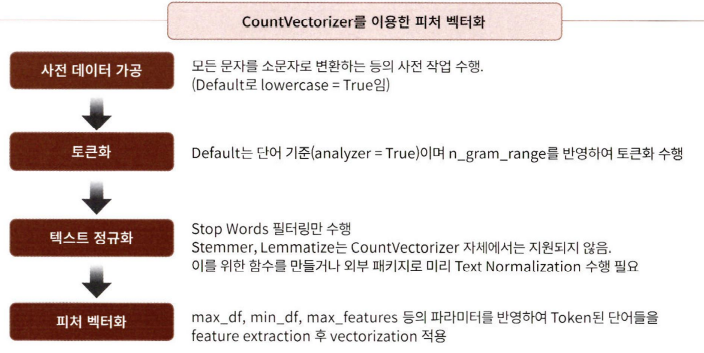

**BOW 벡터화를 위한 희소 행렬**

희소 행렬이 적은 메모리 공간을 차지할 수 있도록 변환 필요

**COO 형식**

- COO(Coordinate: 좌표) 형식은 0이 아닌 데이터만 행과 열의 위치를 별도의 데이터 배열에 저장. 

In [19]:
import numpy as np
dense = np.array([[3,0,1],[0,2,0]])

from scipy import sparse
# 0이 아닌 데이터 추출
data = np.array([3,1,2])
# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1]) # 행 위치
col_pos = np.array([0,2,1]) # 열 위치
# sparse 패키지의 coo_matrix를 이용해 C00 형식으로 희소 행렬 생성
sprase_coo = sparse.coo_matrix((data, (row_pos, col_pos)))
sprase_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

**CSR 형식**

- COO형식이 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식 -> 고유 값의 시작 위치를 저장

- Compressed Sparse Row의 약자

- COO 방식보다 메모리가 적게 들고 빠른 연산이 가능

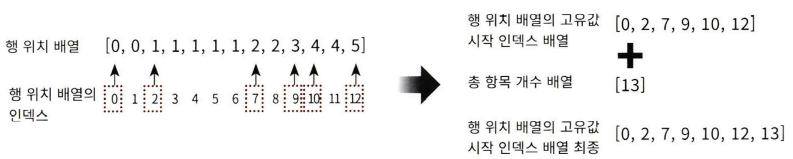

In [23]:
from scipy import sparse
dense = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])
# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])
# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# C00 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))
# 행 위치 배열과 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])
# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [24]:
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [28]:
coo.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])

In [29]:
csr.toarray()

array([[0, 0, 1, 0, 0, 5],
       [1, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8],
       [1, 0, 0, 0, 0, 0]])